# Importing libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

# Importing files and feeding the files to the model

In [2]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)

# Creating a list and extracting class labels from a text file

In [3]:
classlabels = []
file_name='labels.txt'
with open (file_name,'rt') as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')

# Setting up the model according to the configuration

In [4]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7f7d925596b0>

# Reading an image using cv2


In [5]:
img= cv2.imread('img.jpg')

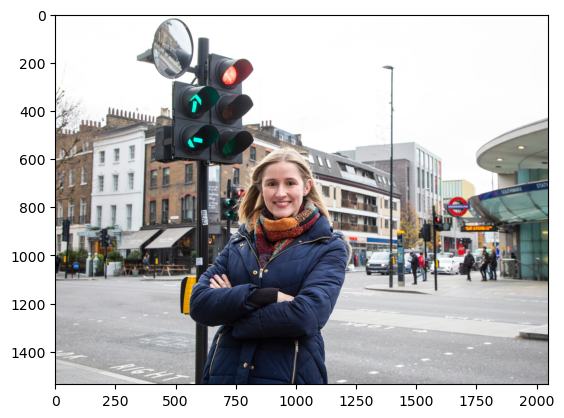

In [6]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Extracting information of the objects detected using the model

In [7]:
#Setting the confidence in the variable confThreshold which can be adjusted accordingly
ClassIndex, confidence , bbox = model.detect(img,confThreshold=0.7) 

# Settings for plotting the informtion onto the image

In [8]:
font= cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex,confidence,bbox):
    cv2.rectangle(img,boxes,(0,0,255),5)
    cv2.putText(img,classlabels[ClassInd-1],(boxes[0],boxes[1]-20),font,fontScale=4,
                color=(255,0,0),thickness=5)

# Plotting the image with the data

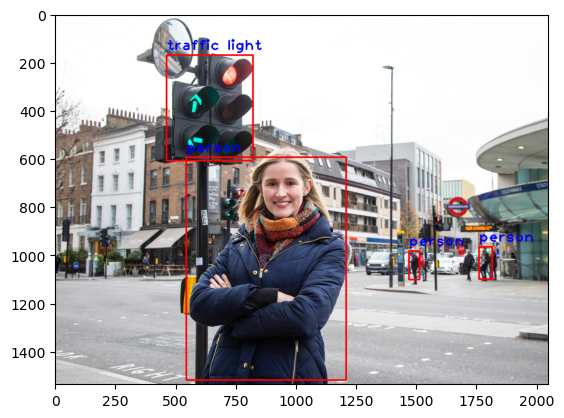

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #converting the image to Rgb as cv2 reads the image in BGR format

# Setting up the model for detection of objects in a video


In [10]:
cap= cv2.VideoCapture("video6.mp4")

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex,confidence,bbox=model.detect(frame,confThreshold=0.6)
    if(len(ClassIndex)!=0):
        for ClassInd,conf,boxes in zip(ClassIndex,confidence,bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(0,0,255),5)
                cv2.putText(frame,classlabels[ClassInd-1],(boxes[0],boxes[1]-20),font,fontScale=font_scale,
                            color=(255,0,0),thickness=5)
    cv2.imshow('Object detection',frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows() 

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
